# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Elfath Maghfira Pasha
- **Email:** elfathpasha@gmail.com
- **ID Dicoding:** elfath_pasha

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran jumlah transaksi apabila ditinjau berdasarkan state permbeli?
- Di kota mana saja perserabaran transaksi tercatat sebagai nilai tertinggi?
- Berapa lama waktu yang dibutuhkan pembeli sejak membuat pesanan hingga barang diterima?
- Berapa pembeli yang melakukan repeat order?
- Berapa kenaikan jumlah pembeli setiap bulannya?
- Bagaimana performa seller apabila ditinjau berdasarkan score yang diberikan pembeli?
- Kategori barang apa yang paling laku dijual dan paling tidak laku dijual?
- Bagaimana korelasi antara lama waktu menerima barang dengan score yang diberikan pembeli?
- Bagaimana korelasi ukuran barang dengan jumlah item barang yang dipesan oleh pembeli?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [7]:
customers_df = pd.read_csv ("/content/customers_dataset.csv", delimiter = ',')
geolocation_df = pd.read_csv ("/content/geolocation_dataset.csv", delimiter =',')
orderitems_df = pd.read_csv ("/content/order_items_dataset.csv", delimiter =',')
payments_df = pd.read_csv ("/content/order_payments_dataset.csv", delimiter = ',')
reviews_df = pd.read_csv ("/content/order_reviews_dataset.csv", delimiter = ',')
orders_df = pd.read_csv ("/content/orders_dataset.csv", delimiter = ',')
category_df = pd.read_csv ("/content/product_category_name_translation.csv", delimiter = ',')
products_df = pd.read_csv ("/content/products_dataset.csv", delimiter = ',')
seller_df = pd.read_csv ("/content/sellers_dataset.csv", delimiter = ',')

### Assessing Data

In [8]:
customers_df.info()
print ("Jumlah Duplikasi =   ", customers_df.duplicated().sum())
customers_df.describe()

geolocation_df.info()
print ("Jumlah Duplikasi =   ", geolocation_df.duplicated().sum())
geolocation_df.describe()

orderitems_df.info()
print ("Jumlah Duplikasi =   ", orderitems_df.duplicated().sum())
orderitems_df.describe()

payments_df.info()
print ("Jumlah Duplikasi =   ", payments_df.duplicated().sum())
payments_df.describe()

reviews_df.info()
print ("Jumlah Duplikasi =   ", reviews_df.duplicated().sum())
reviews_df.describe()
reviews_df.isna().sum()

orders_df.info()
print ("Jumlah Duplikasi =   ", orders_df.duplicated().sum())
orders_df.describe()
orders_df.isna().sum()

category_df.info()
print ("Jumlah Duplikasi =   ", category_df.duplicated().sum())
category_df.describe()

products_df.info()
print ("Jumlah Duplikasi =   ", products_df.duplicated().sum())
products_df.describe()
products_df.isna().sum()

seller_df.info()
print ("Jumlah Duplikasi =   ", seller_df.duplicated().sum())
seller_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah Duplikasi =    0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city       

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

In [9]:
#Data duplicate pada data geolocation_df
geolocation_df.drop_duplicates(inplace=True)
print ("Jumlah duplikasi = ", geolocation_df.duplicated().sum())



Jumlah duplikasi =  0


In [10]:
#Tipe data pada data orderitems_df
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
    orderitems_df [column] = pd.to_datetime (orderitems_df[column])
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [11]:
#Missing value dan tipe data di reviews_df
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
    reviews_df [column] = pd.to_datetime (reviews_df[column])

#Imputation
reviews_df[reviews_df.review_comment_title.isna()]
reviews_df[reviews_df.review_comment_message.isna()]
reviews_df.fillna({"review_comment_title": "No Comment", "review_comment_message": "No Comment"}, inplace=True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [12]:
#Missing value dan tipe data di orders_df
datetime_columns = ["order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df [column] = pd.to_datetime (orders_df[column])

orders_df[orders_df.order_approved_at.isna()]
orders_df[orders_df.order_delivered_carrier_date.isna()]
orders_df[orders_df.order_delivered_customer_date.isna()]
#Interpolasi
orders_df = orders_df.sort_values(by='order_approved_at')
orders_df['order_approved_at'] = orders_df['order_approved_at'].interpolate(method='pad')
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].interpolate(method='pad')
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].interpolate(method='pad')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 30710 to 99347
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.8+ MB


In [13]:
#Missing value di products_df
products_df [products_df.product_category_name.isna() | products_df.product_name_lenght.isna() | products_df.product_description_lenght.isna() | products_df.product_photos_qty .isna() | products_df.product_weight_g.isna() | products_df.product_length_cm.isna() | products_df. product_height_cm.isna()| products_df.product_width_cm.isna()]
products_df.product_category_name.value_counts()
products_df.fillna({"product_category_name":"cama_mesa_banho"}, inplace=True)
products_df.fillna({"product_name_lenght" : 60.0}, inplace=True)
products_df.fillna({"product_description_lenght" : 404.0}, inplace=True)
fill_mean = {
    'product_photos_qty': products_df['product_photos_qty'].mean(),
    'product_weight_g': products_df['product_weight_g'].mean(),
    'product_length_cm': products_df['product_length_cm'].mean(),
    'product_height_cm': products_df['product_height_cm'].mean(),
    'product_width_cm': products_df['product_width_cm'].mean()
}
products_df.fillna(fill_mean, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
#Jumlah Persebaran Transaksi berdasarkan State
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Berdasarkan proses analisa data yang dilakukan, dapat dilihat jumlah transaksi yang terjadi pada setiap state. Hal tersebut mencerminkan bagaimana persebaran transaksi apabila ditinjau berdasarkan state pembeli.

In [15]:
#25 kota dengan catatan transaksi tertinggi
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(25)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
santos                     713
goiania                    692
sao jose dos campos        691
fortaleza                  654
sorocaba                   633
recife                     613
florianopolis              570
jundiai                    565
ribeirao preto             510
belem                      447
nova iguacu                442
barueri                    433
Name: customer_id, dtype: int64

Dari output program, terdata dengan jelas di kota mana saja transaksi tercatat sebagai terbanyak. Program memberikan 25 kota dengan riwayat transaksi terbanyak.

In [16]:
#Waktu yang dibutuhkan untuk menerima barang
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
#Karena ada nilai-nilai janggal, maka kita cari tau batas normal
Q1 = orders_df["delivery_time"].quantile(0.25)
Q3 = orders_df["delivery_time"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

filtered_orders_df = orders_df[(orders_df["delivery_time"] >= 0) & (orders_df["delivery_time"] <= 29.5) & (orders_df["order_status"] != "canceled")].copy()
filtered_orders_df.describe(include="all")

Lower Bound: -6.5
Upper Bound: 29.5


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,93930,93930,93930,93930,93930,93930,93930,93930,93930.000000
unique,93930,93930,6,NaN,86189,NaN,NaN,NaN,NaN
top,1ff217aa612f6cd7c4255c9bfe931c8b,b3a9bf200375f53cc5c6991919c356fd,delivered,NaN,2018-09-03 17:40:06,NaN,NaN,NaN,NaN
freq,1,1,91741,NaN,14,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 23:35:27.635632896,NaN,2018-01-04 00:17:23.424922624,2018-01-12 01:46:09.562887424,2018-01-24 10:34:01.571383296,11.049377
min,NaN,NaN,NaN,2016-10-03 09:44:50,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-10 10:08:45.500000,NaN,2017-09-12 21:28:06.249999872,2017-09-19 21:23:16.500000,2017-09-29 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-18 13:52:25.500000,NaN,2018-01-22 21:27:51.500000,2018-01-30 22:04:47,2018-02-14 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-07 22:48:44.750000128,NaN,2018-05-10 09:02:30,2018-05-16 22:21:42,2018-05-29 00:00:00,15.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,2018-08-31 15:25:00,2018-09-11 00:37:34,2018-10-25 00:00:00,29.000000


Program dilakukan tindakan filtrasi karena terdapat data yang kurang akurat, dalam hal ini adalah tanggal barang diterima tercatat lebih dulu daripada tanggal pesanan dibuat. Selain itu, data dengan status pengiriman canceled tidak dapat dijadikan tolak ukur berapa lama waktu yang diperlukan untuk sampainya barang. Setelah menghilangkan outlier, didapatkan bahwa barang tercepat datang ialah dalam waktu 1 hari dan terlama datang ialah 29 hari. Adapun rata-rata dari semua pengiriman yang dianggap akurat membutuhkan waktu selama 11 hari proses hingga barang diterima oleh pembeli.

In [17]:
#Jumlah customer yang melakukan Repeat order
orders_df.groupby("customer_id").size()
customer_order_counts = orders_df.groupby("customer_id").size()
repeat_customers = customer_order_counts[customer_order_counts > 1]
print("Number of repeat customers: ", repeat_customers.count())

Number of repeat customers:  0


Jumlah pembeli yang melakukan repeat order pada e-commerce ini ialah 0. Artinya, semua pembeli hanya melakukan pembelian sejumlah 1x saja dan customer_id tercatat unik untuk setiap data.

In [18]:
#Kenaikan Customer tiap Bulan
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
new_customers_by_month = orders_df.groupby('order_month').size().reset_index(name='new_customers')
new_customers_by_month['previous_month_customers'] = new_customers_by_month['new_customers'].shift(1)
new_customers_by_month['increase'] = new_customers_by_month['new_customers'] - new_customers_by_month['previous_month_customers']
new_customers_by_month['percentage_increase'] = (new_customers_by_month['increase'] / new_customers_by_month['previous_month_customers']) * 100
print(new_customers_by_month)

   order_month  new_customers  previous_month_customers  increase  \
0      2016-09              4                       NaN       NaN   
1      2016-10            324                       4.0     320.0   
2      2016-12              1                     324.0    -323.0   
3      2017-01            800                       1.0     799.0   
4      2017-02           1780                     800.0     980.0   
5      2017-03           2682                    1780.0     902.0   
6      2017-04           2404                    2682.0    -278.0   
7      2017-05           3700                    2404.0    1296.0   
8      2017-06           3245                    3700.0    -455.0   
9      2017-07           4026                    3245.0     781.0   
10     2017-08           4331                    4026.0     305.0   
11     2017-09           4285                    4331.0     -46.0   
12     2017-10           4631                    4285.0     346.0   
13     2017-11           7544     

Dapat terlihat bagaimana kenaikan jumlah pembeli baru dalam setiap bulannya. Kenaikan jumlah pembeli paling banyak belum pasti sebagai data dengan kenaikan persentase jumlah pembeli tertinggi. Hal tersebut dikarenakan faktor jumlah pembeli pada bulan sebelumnya.

In [19]:
#Performa seller bila dilihat dari score yang diberikan oleh pembeli
seller_orderitems_df = pd.merge(
    left=seller_df,
    right=orderitems_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
seller_orderitems_score_df = pd.merge(
    left= seller_orderitems_df,
    right= reviews_df,
    how= "left",
    left_on= "order_id",
    right_on="order_id"
)
seller_orderitems_score_df.groupby(by="review_score").seller_id.nunique().sort_values(ascending=False)


review_score
5.0    2700
4.0    1980
1.0    1774
3.0    1420
2.0     929
Name: seller_id, dtype: int64

Seller yang mendapatkan score 5 dari pembeli mendominasi, namun peningkatan dan evaluasi tetap perlu dilakukan secara masif karena seller yang mendapatkan score 1 masih menduduki posisi ketiga dengan jumlah yang masih banyak.

In [20]:
#Kategori barang yang paling laku terjual dan paling tidak laku terjual
products_category_df = pd.merge(
    left= products_df,
    right= category_df,
    how= "left",
    left_on= "product_category_name",
    right_on="product_category_name"
)

products_category_orderitems_df = pd.merge(
    left= products_category_df,
    right= orderitems_df,
    how= "left",
    left_on= "product_id",
    right_on="product_id"
)
products_category_orderitems_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               10860
health_beauty                 8836
sports_leisure                7720
computers_accessories         6689
furniture_decor               6449
                             ...  
arts_and_craftmanship           23
la_cuisine                      13
cds_dvds_musicals               12
fashion_childrens_clothes        8
security_and_services            2
Name: order_id, Length: 71, dtype: int64

Seperti yang tampil pada output, tampak kategori produk dengan penjualan tertinggi dan terendah.

In [21]:
#Korelasi antara lama waktu pengiriman dengan reviews score yang diberikan
orders_reviews_df = pd.merge(
    left= filtered_orders_df,
    right= reviews_df,
    how= "left",
    left_on= "order_id",
    right_on="order_id"
)
orders_reviews_df['delivery_time'].corr(orders_reviews_df['review_score'])

-0.1693184912883912

Hasil nilai korelasi menunjukkan bahwa terdapat kecenderungan hubungan dua variable ialah berbanding terbalik, namun nilainya yang tidak mendekati 1 menandakan bahwa hubungan dua variabel tidak linier.

In [22]:
#Korelasi ukuran barang dengan jumlah item yang dibeli dalam pesanan
products_category_orderitems_df ["size_barang"] = products_category_orderitems_df ["product_length_cm"]*products_category_orderitems_df ["product_height_cm"]*products_category_orderitems_df ["product_width_cm"]
products_category_orderitems_df["size_barang"].corr(products_category_orderitems_df["order_item_id"])

0.004479349560097103

Nilai korelasi menunjukkan bahwa ukuran produk dengan jumlah item yang dibeli dalam pesanan tidak linier. Hal ini dapat diartikan bahwa ketika memesan produk, pembeli tidak menjadikan ukuran produk sebagai pertimbangan utama.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

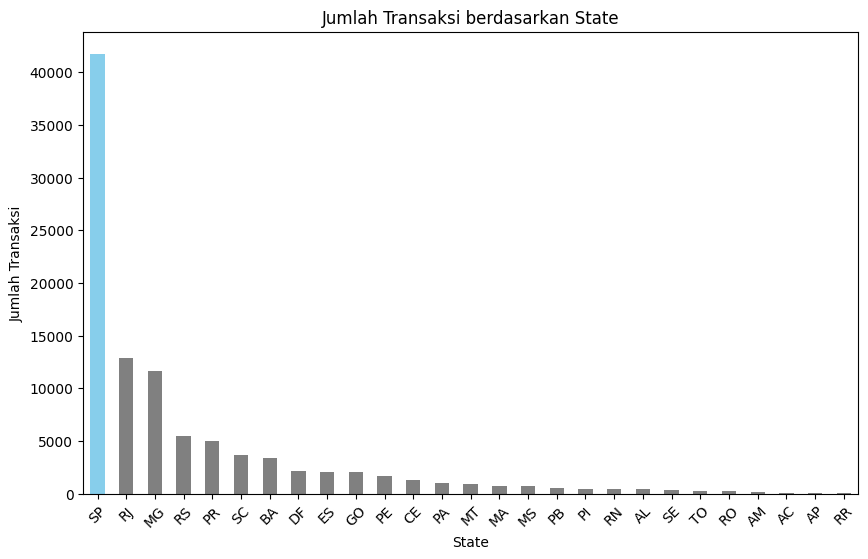

In [21]:
#Jumlah Transaksi berdasarkan State
Jumlah_Transaksi_berdasarkan_State  = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
colors = ['skyblue' if val == Jumlah_Transaksi_berdasarkan_State.max() else 'gray' for val in Jumlah_Transaksi_berdasarkan_State]
plt.figure(figsize=(10, 6))
Jumlah_Transaksi_berdasarkan_State .plot(kind='bar', color=colors)
plt.title('Jumlah Transaksi berdasarkan State')
plt.xlabel('State')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

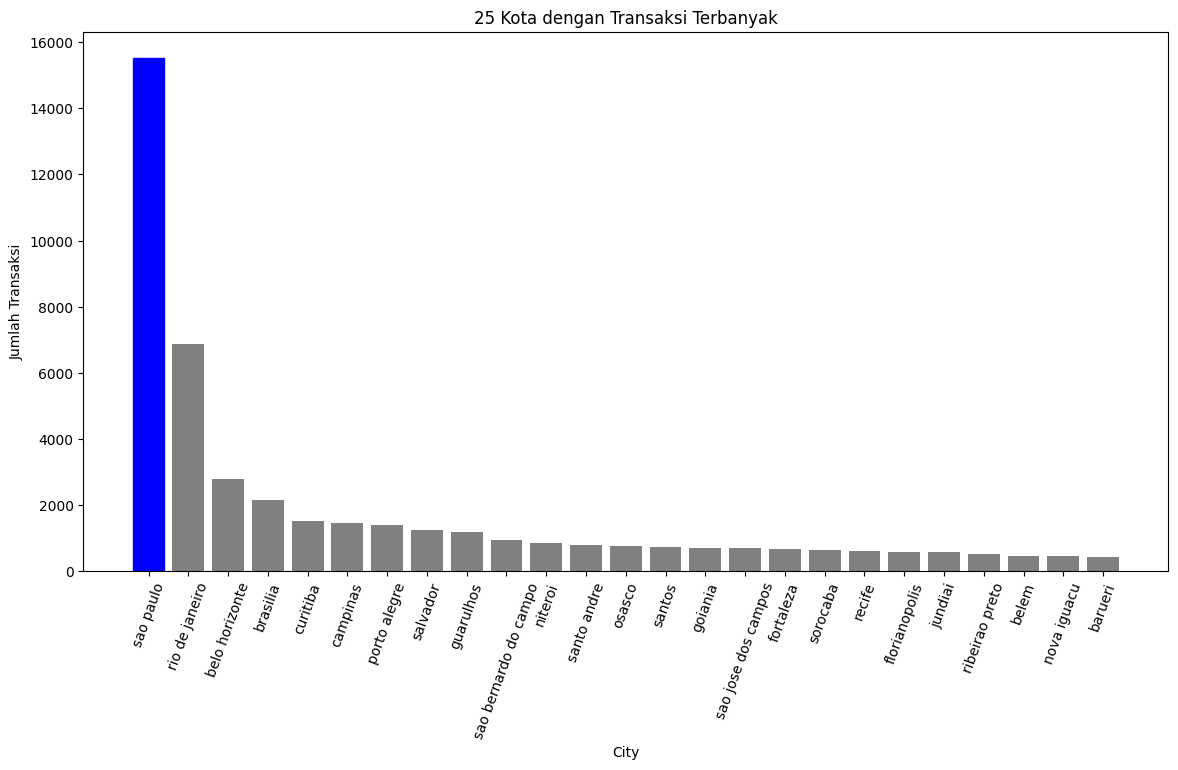

In [22]:
#25 Kota dengan Transaksi Terbanyak
top_25_kota = customers_df.groupby('customer_city').customer_id.nunique().sort_values(ascending=False).head(25)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_25_kota.index, top_25_kota.values, color='grey')
bars[0].set_color('blue')

plt.xlabel('City')
plt.ylabel('Jumlah Transaksi')
plt.title('25 Kota dengan Transaksi Terbanyak')
plt.xticks(rotation=70)
plt.show()

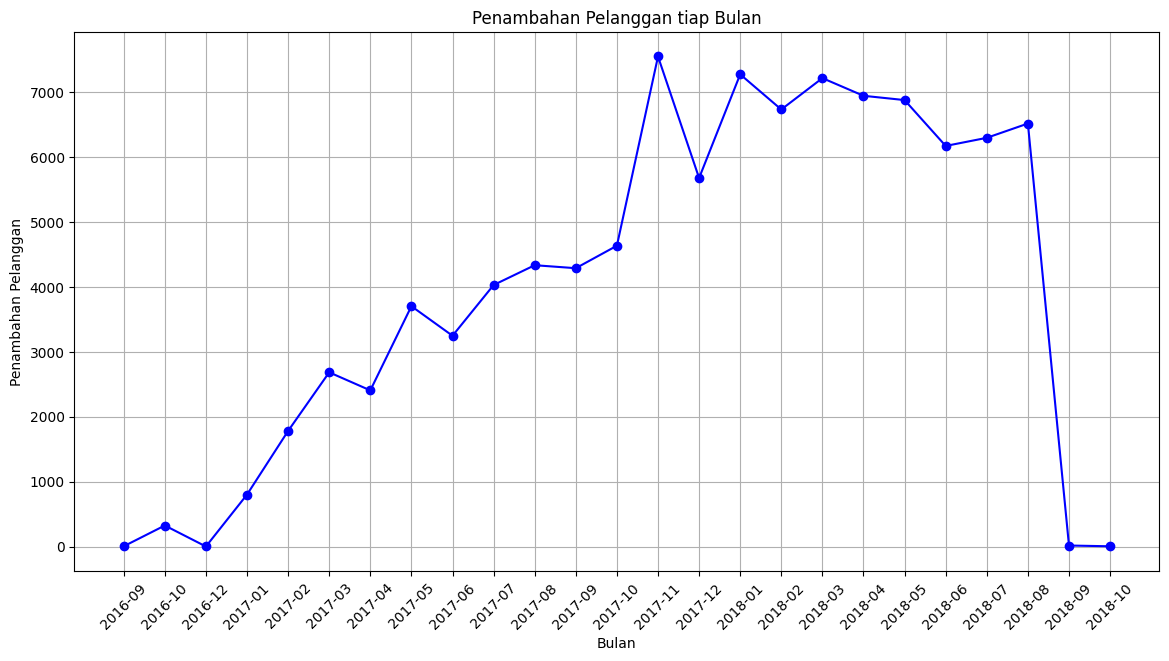

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(new_customers_by_month['order_month'].astype(str), new_customers_by_month['new_customers'], marker='o', linestyle='-', color='b')
plt.xlabel('Bulan')
plt.ylabel('Penambahan Pelanggan')
plt.title('Penambahan Pelanggan tiap Bulan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

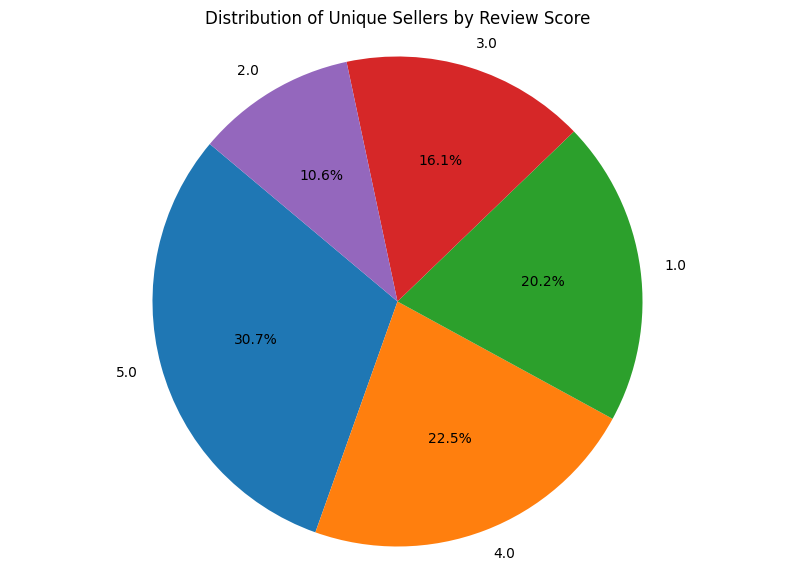

In [24]:
review_score_counts = seller_orderitems_score_df.groupby(by="review_score").seller_id.nunique().sort_values(ascending=False)

# Buat diagram lingkaran
plt.figure(figsize=(10, 7))
plt.pie(review_score_counts, labels=review_score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Sellers by Review Score')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

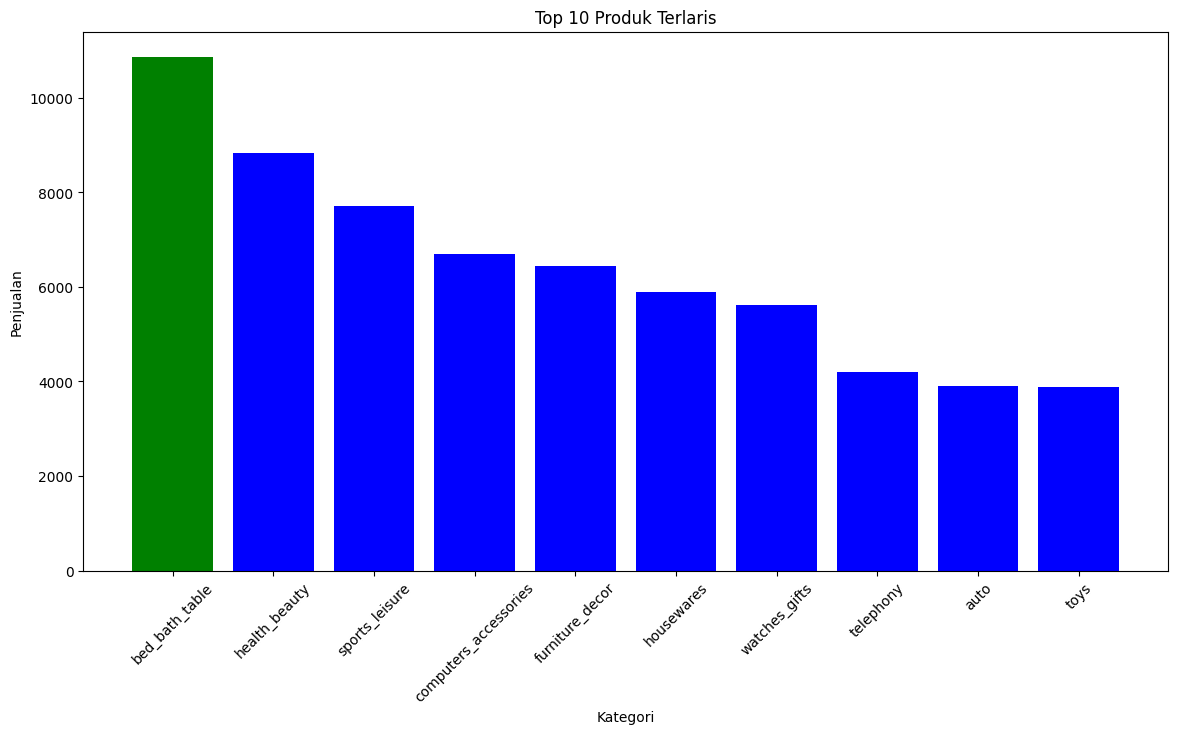

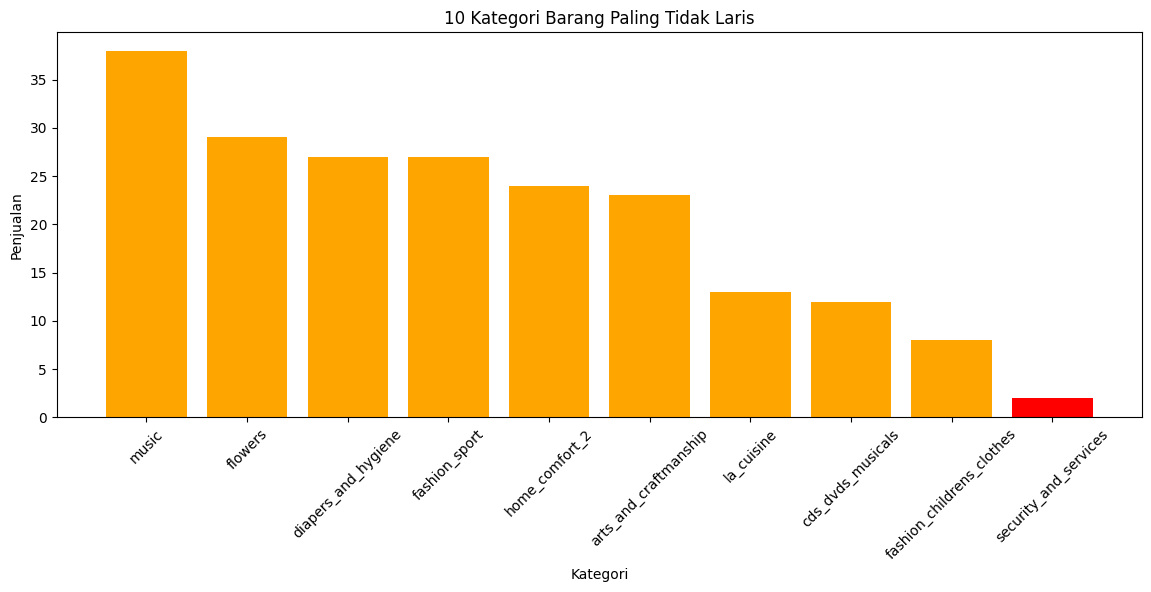

In [23]:
category_order_counts = products_category_orderitems_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False)
top_10_categories = category_order_counts.head(10)
bottom_10_categories = category_order_counts.tail(10)

# Buat diagram batang untuk 10 nilai tertinggi
plt.figure(figsize=(14, 7))
colors = ['blue' if value != top_10_categories.max() else 'green' for value in top_10_categories.values]
plt.bar(top_10_categories.index, top_10_categories.values, color=colors)
plt.xlabel('Kategori')
plt.ylabel('Penjualan')
plt.title('Top 10 Produk Terlaris')
plt.xticks(rotation=45)
plt.show()

# Buat diagram batang untuk 10 nilai terendah
plt.figure(figsize=(14, 5))
colors = ['orange' if value != bottom_10_categories.min() else 'red' for value in bottom_10_categories.values]
plt.bar(bottom_10_categories.index, bottom_10_categories.values, color=colors)
plt.xlabel('Kategori')
plt.ylabel('Penjualan')
plt.title('10 Kategori Barang Paling Tidak Laris')
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclusion 1
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
- Conclution 2
Dapat dilihat 25 Kota dengan transaksi terbanyak
- Conclusion 3
Rata-rata dibutuhkan waktu 11 hari
- Conclusion 4
Tidak ada pembeli yang repeat order
- Conclusion 5
Kenaikan fluktuatif, dapat dilihat pada hasil analisis
- Conclusion 6
Mayoritas seller mendapat rating 5
- Conclusion 7
Paling laku adalah bed bath table dan paling tidak laku adalah security and services
- Conclusion 8
Tidak Linear
-Conclusion 9
Tidak Linear
